In [69]:
#Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
#Import csv file and inspect the data
data = pd.read_csv('all_data.csv')
print(data.head()) #get fprmat of table and see how values are written
print(data.info()) #get datatypes and length
country_list = data['Country'].unique() #get a list of the countries in the dataset, save it to country_list
print(country_list)
year_list = data['Year'].unique() #determine time range of data, save it to year_list
print(year_list) 
print(min(data['Life expectancy at birth (years)'])) #determine range of data values
print(max(data['Life expectancy at birth (years)']))
print(min(data['GDP']))
print(max(data['GDP']))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimba

In [15]:
#This dataset tracks life expectancy and GDP for 6 different countries from 2000 to 2015.
#These countries are Chile, China, Germany, Mexico, United States of America, and Zimbabwe.
#Life expectancy ranges from 44.3 to 81.0 years, and GDP ranges from $4.4 billion to $18.1 trillion.
#There do not appear to be any null or zero values, so analysis may proceed without altering the values.

In [53]:
#Determine average lifespan and GDP for each country
averages = data.groupby(['Year']).mean()
avg_lifespans = averages['Life expectancy at birth (years)']
avg_gdps = averages['GDP']
#Add these values to the dataframe, as if they were attributes of a hypothetical "average" country, for plotting
for year in year_list:
    list = ['Average', year, avg_lifespans[year], avg_gdps[year]]
    row = pd.Series(list, index=data.columns)
    data = data.append(row, ignore_index=True)

[]

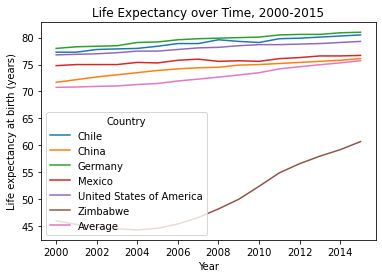

In [62]:
#Plot each country's lifespan over time
sns.lineplot(x='Year', y='Life expectancy at birth (years)', data=data, hue='Country')
plt.title('Life Expectancy over Time, 2000-2015')
plt.plot()

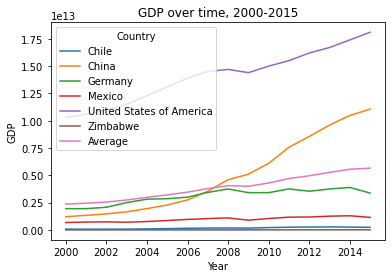

In [63]:
#Plot each country's GDP over time
plt.clf()
sns.lineplot(x='Year', y='GDP', data=data, hue='Country')
plt.title('GDP over time, 2000-2015')
plt.show()

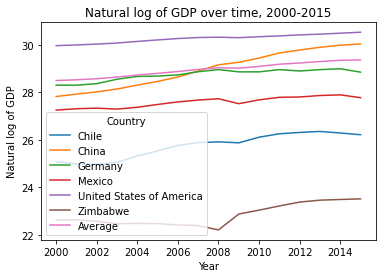

In [86]:
#Plot the natural log of GDP so the lower-income countries aren't all mashed into the bottom
plt.clf()
data['Log GDP'] = data['GDP'].apply(lambda x: np.log(x))
sns.lineplot(x='Year', y='Log GDP', data=data, hue='Country')
plt.title('Natural log of GDP over time, 2000-2015')
plt.ylabel('Natural log of GDP')
plt.show()

The correlation between life expectancy and GDP is 0.3467


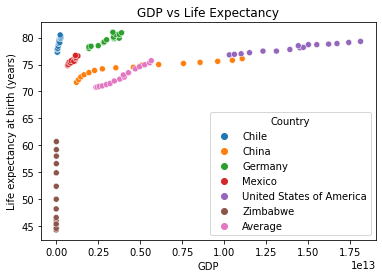

The correlation between life expectancy and ln(GDP) is 0.7658


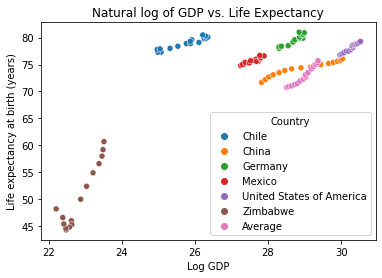

In [85]:
#Find the correlation between GDP and life expectancy
plt.clf()
lifespan_array = np.array(data['Life expectancy at birth (years)'])
gdp_array = np.array(data['GDP'])
correlation = np.corrcoef(lifespan_array, gdp_array)[0][1]
print('The correlation between life expectancy and GDP is '+str(round(correlation, 4)))
plt.title('GDP vs Life Expectancy')
sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',hue='Country', data=data)
plt.show()

#Find the correlation between natural log of GDP and life expectancy 
plt.clf()
log_gdp_array = np.array(data['Log GDP'])
log_correlation = np.corrcoef(lifespan_array, log_gdp_array)[0][1]
print('The correlation between life expectancy and ln(GDP) is '+str(round(log_correlation, 4)))
sns.scatterplot(x='Log GDP', y='Life expectancy at birth (years)',hue='Country', data=data)
plt.title('Natural log of GDP vs. Life Expectancy')
plt.show()

In [ ]:
#Conclusions: Between 2000 and 2015, GDP and life expectancy rose in all 6 countries identified in the dataset.
#In these countries, life expectancy and GDP have a weak positive correlation (0.3467).
#However, there is a strong positive correlation (0.7658) between the natural log of GDP and life expectancy.
#Looking at the scatter plots of GDP and life expectancy, it seems that economic growth increases life expectancy substantially.
#However, this effect brings diminishing returns as GDP increase continues. 